In [56]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
import time
from tqdm import tqdm


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
data_path = '/content/drive/My Drive/Autism'
train_data_path = '/content/drive/My Drive/Autism/train/train'
test_data_path = '/content/drive/My Drive/Autism/test/test'
validation_data_path = '/content/drive/My Drive/Autism/valid/valid'

In [147]:
import tensorflow as tf

# Specify batch size and image size
batch_size = 32
image_size = (224, 224)

# Create data generators for each set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test, only rescale without data augmentation
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)



# Load and preprocess the data using the data generators
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # for classification tasks
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2526 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


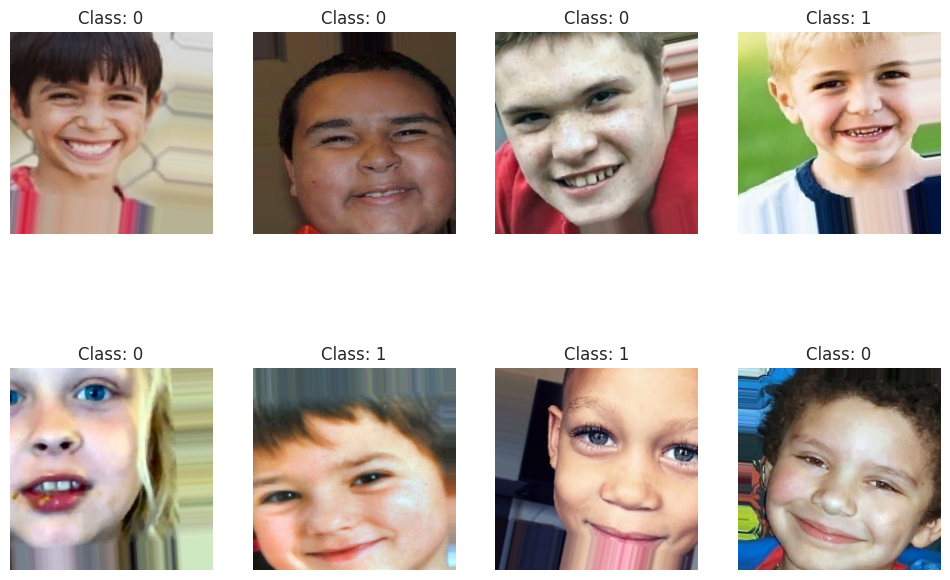

In [50]:
images, labels = train_generator.next()

#Plotting the images
def plot_images(images, labels, num_images_to_plot=8):
    plt.figure(figsize=(12, 8))
    for i in range(num_images_to_plot):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f'Class: {labels[i].argmax()}')
        plt.axis('off')
    plt.show()

# Plot a batch of images
plot_images(images, labels, num_images_to_plot=8)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening the output for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with the appropriate number of classes

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [36]:
# Define the number of epochs and steps per epoch
num_epochs = 20
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# Fit the model to the data
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Evaluate the model on the test data
test_steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/20
79/79 [==============================] - 294s 4s/step - loss: 0.7426 - accuracy: 0.5222 - val_loss: 0.6713 - val_accuracy: 0.5000
Epoch 2/20
79/79 [==============================] - 291s 4s/step - loss: 0.6772 - accuracy: 0.5954 - val_loss: 0.6521 - val_accuracy: 0.6350
Epoch 3/20
79/79 [==============================] - 290s 4s/step - loss: 0.6592 - accuracy: 0.6164 - val_loss: 0.6394 - val_accuracy: 0.6250
Epoch 4/20
79/79 [==============================] - 291s 4s/step - loss: 0.6524 - accuracy: 0.6267 - val_loss: 0.6059 - val_accuracy: 0.6650
Epoch 5/20
79/79 [==============================] - 291s 4s/step - loss: 0.6389 - accuracy: 0.6358 - val_loss: 0.6191 - val_accuracy: 0.6000
Epoch 6/20
79/79 [==============================] - 292s 4s/step - loss: 0.6318 - accuracy: 0.6409 - val_loss: 0.6033 - val_accuracy: 0.7000
Epoch 7/20
79/79 [==============================] - 290s 4s/step - loss: 0.6271 - accuracy: 0.6485 - val_loss: 0.6036 - val_accuracy: 0.6850
Epoch 8/20
79

In [45]:
# Saving the Model
working_dir=r'/content/drive/My Drive/Autism'
subject='Final-Autism-Image-model'
save_id= subject + '_' + '.keras'
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)


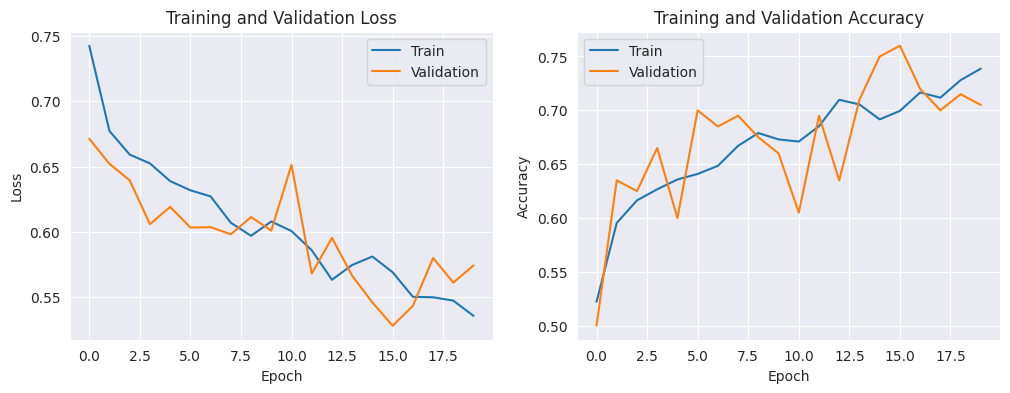

In [38]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

7/7 [==============================] - 8s 1s/step - loss: 0.4080 - accuracy: 0.8350
Test loss: 0.4080
Test accuracy: 0.8350
7/7 [==============================] - 5s 707ms/step


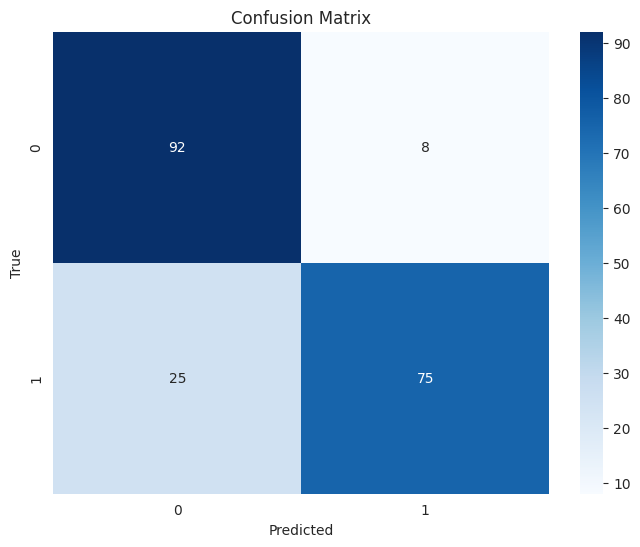

In [41]:
test_steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

true_labels_onehot = np.concatenate([test_generator[i][1] for i in range(test_steps)])
true_labels = np.argmax(true_labels_onehot, axis=1)

predicted_labels = model.predict(test_generator, steps=test_steps)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()







In [43]:
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.90      0.75      0.82       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [52]:
pretrained_model = keras.models.load_model('/content/drive/My Drive/Autism/Autism-Image-model_.keras')

In [53]:
batch_size = 32
image_size = (224, 224)
test_data_path = '/content/drive/My Drive/Autism/test/test'

test_datagen = ImageDataGenerator(rescale=1.0/255)


test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


test_steps = len(test_generator)
test_loss, test_accuracy = pretrained_model.evaluate(test_generator, steps=test_steps)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Found 200 images belonging to 2 classes.
7/7 [==============================] - 7s 718ms/step - loss: 0.4080 - accuracy: 0.8350
Test loss: 0.4080
Test accuracy: 0.8350


In [87]:
import numpy as np
from keras.models import load_model, Model
from keras.layers import Input
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input


# Create a new model with a modified input shape for single images
img_height, img_width, num_channels = 224, 224, 3
single_image_input = Input(shape=(img_height, img_width, num_channels))
output = pretrained_model(single_image_input)

new_model = Model(inputs=single_image_input, outputs=output)

# Function for preprocessing a single image
def preprocess_single_image(image_path, target_size=(img_height, img_width)):
    img = load_img(image_path, target_size=target_size)  # Load and resize the image
    img = img_to_array(img)
    img = preprocess_input(img)
    return img.reshape((1,) + img.shape)  # Reshaping to (1, height, width, channels) for batch size 1


test_image_path = '/content/drive/My Drive/Autism/test/test/non_autistic/014.jpg'

# Preprocess the single test image
img = preprocess_single_image(test_image_path)

# Making predictions using the new model
predictions = new_model.predict(img)
class_prediction = np.argmax(predictions, axis=1)

new_model.save('/content/drive/My Drive/Autism/Final-Autism-Image-model-SingleImage.keras')

1/1 [==============================] - 0s 201ms/step
